In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
alpha=pd.read_csv('A_Z Handwritten Data.csv')

In [ ]:
alphadata=alpha.sample(frac=.15,random_state=0)d

In [ ]:
alpha.shape

(372450, 785)

In [ ]:
alphadata.shape

(55868, 785)

In [ ]:
alphalabels=alphadata["0"]

In [ ]:
len(np.unique(alphalabels))

26

In [ ]:
alphadata.drop(['0'],axis=1,inplace=True)

In [ ]:
from keras.datasets import mnist

In [ ]:
((dtrain,dtrainlabels),(dtest,dtestlabels))=mnist.load_data()

In [ ]:
dtrain.shape

(60000, 28, 28)

In [ ]:
alphalabels=alphalabels+10

In [ ]:
azdata=np.array(alphadata)

In [ ]:
azdata.shape

(55868, 784)

In [ ]:
azdata=azdata.reshape(55868,28,28)

In [ ]:
azdata.shape

(55868, 28, 28)

In [ ]:
alphalabels=np.array(alphalabels)

In [ ]:
data=np.vstack([dtrain,azdata])
label=np.hstack([dtrainlabels,alphalabels])

In [ ]:
data=data.astype('float32')

In [ ]:
# data = [cv.resize(image, (32, 32)) for image in data]
# data = np.array(data, dtype="float32")

In [ ]:
data.shape

(115868, 28, 28)

In [ ]:
data=data.reshape(115868, 28, 28,1)

In [ ]:
len(np.unique(label))

36

In [ ]:
labels=pd.get_dummies(label)

In [ ]:
labels.shape

(115868, 36)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,labels)

In [ ]:
X_test.shape

(28967, 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16

In [ ]:
datagen=ImageDataGenerator(rescale=1/255,rotation_range=10,zoom_range=0.05,shear_range=0.15,width_shift_range=0.1,height_shift_range=.1,fill_mode='nearest')

In [ ]:
## the 1dim array GRAY
model=Sequential()
model.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
bs=128

In [ ]:
model.fit_generator(datagen.flow(X_train,y_train,batch_size=bs),steps_per_epoch=len(X_train)//bs,validation_data=(X_test,y_test),epochs=10,class_weight='classWeight',
	verbose=1)

Epoch 1/10
678/678 [==============================] - 207s 305ms/step - loss: 0.0596 - acc: 0.9807 - val_loss: 0.1238 - val_acc: 0.9921
Epoch 2/10
678/678 [==============================] - 106s 157ms/step - loss: 0.0348 - acc: 0.9871 - val_loss: 0.1115 - val_acc: 0.9928
Epoch 3/10
678/678 [==============================] - 104s 154ms/step - loss: 0.0295 - acc: 0.9890 - val_loss: 0.1092 - val_acc: 0.9930
Epoch 4/10
678/678 [==============================] - 109s 161ms/step - loss: 0.0266 - acc: 0.9901 - val_loss: 0.1138 - val_acc: 0.9927
Epoch 5/10
678/678 [==============================] - 100s 147ms/step - loss: 0.0244 - acc: 0.9908 - val_loss: 0.1334 - val_acc: 0.9915
Epoch 6/10
678/678 [==============================] - 106s 156ms/step - loss: 0.0230 - acc: 0.9913 - val_loss: 0.1298 - val_acc: 0.9917
Epoch 7/10
678/678 [==============================] - 112s 165ms/step - loss: 0.0219 - acc: 0.9917 - val_loss: 0.1679 - val_acc: 0.9893
Epoch 8/10
678/678 [============================

In [ ]:
labeldata=[0,1,2,3,4,5,6,7,8,9,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
labels.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')

In [ ]:
dic={}
j=0
for i in labeldata:
    dic.update({j:i})
    j+=1

In [ ]:
X_test.shape

(28967, 28, 28, 1)

8
6
U
R
E
6
4
7
2
1


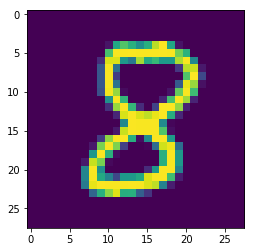

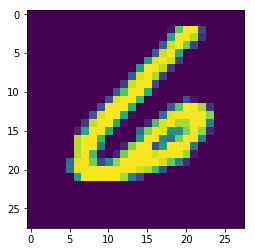

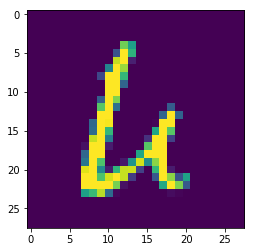

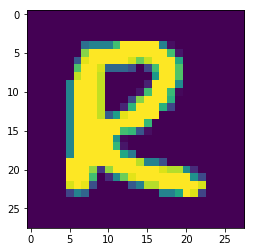

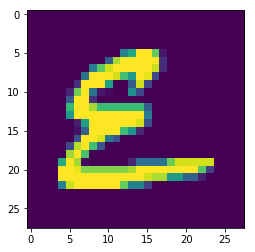

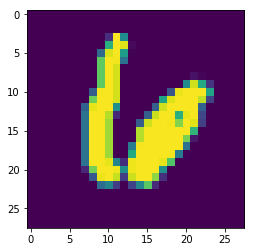

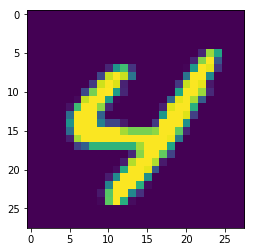

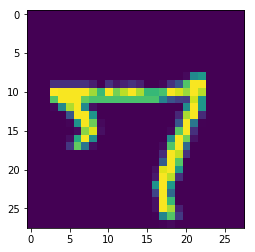

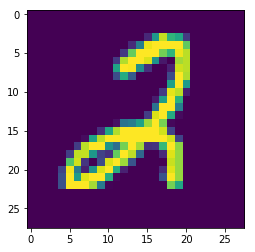

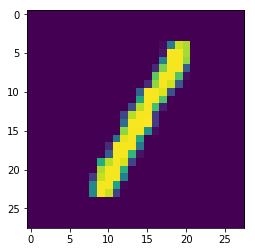

In [ ]:
for i in X_test[:10]:
    k=np.argmax(model.predict(i.reshape(1,28,28,1)))
    im=i.reshape(28,28)
    plt.figure()
    print(dic[k])
    plt.imshow(im)
    
    
    

In [ ]:
model.save('OCRmodel.h5')

In [ ]:
from keras.models import load_model
import cv2 as cv
import imutils
from imutils.contours import sort_contours

In [ ]:
model=load_model('model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               80100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________